<div style="background:#FFFFEE; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">Data Analytics for Strategic Decision Makers (2024 Sem 1)</div>

---
## Creating a narrative to answer significant questions

**SCENARIO:**  The allocation of public money (obtained from the public via taxes) is a politically sensitive activity with governments regularly coming under scrutiny for how this money is spent. A respected media organisation is looking into the Queensland Government's Advance Queensland program. The resulting story could be a "good news" story reporting on the success of the program, however if inappropriate spending or irregularities are found, it could become a story that is critical of the scheme, and potentially the Government.



## Question: 

1. For one of the popular programs, how is the balance of funding between South-East Queensland and the remainder of the state (regional Queensland) each round? 

This question looks at how the funding balance between seq and regional Queensland changed over the rounds, which is significant because it reflects the gap in growth between urban and rural areas. The reason for choosing one of the popular programs to analyze is that it could be more influential to society. Also, it might run longer than others, providing more data over time to analyze trends. 

2. How does the funding allocation support specified groups, such as aboriginal resident or innotative companies?

By answering this question, we can compare the depth (average funding of each program) and breadth (number of projects in each program) of government investment to observe how they align with the scheme's objectives which is bringing innovation to Queensland's economy. After understanding these, the government can adjust the funding allocation in different areas, and adjust the eligibility for applications to better meet future development needs.



## Data: 


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

**1. Load the data:**

In [21]:
url ="https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/0f97b985-f5c7-49d2-8b0a-bc5dfbe070b9/download/advance-queensland-funding-recipients.csv"
df = pd.read_csv(url, encoding='latin-1') 
#some of the characters in this csv file cannot be recognized by default encoding 'utf-8' , so change to 'latin-1' because it can recongnize more characters.

df


,Program,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners; Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project (if applicable),Approval date,Local Government /Council,RAP Region,State Electorate,Actual Contractual Commitment ($)
0,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Central Queensland University,Norman Gardens,4701.0,NaN,BHP Billiton,Decolonising the systematic barriers and enabl...,Brisbane City,4001.0,NaN,14/06/2019,Rockhampton (R),Brisbane and Redlands,Keppel,107084
1,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Griffith University,Nathan,4111.0,NaN,NaN,An indigenous journey through the 21st century...,Nathan,4111.0,NaN,28/01/2016,Brisbane (C),Brisbane and Redlands,Toohey,117500
2,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,Queensland University of Technology,Brisbane City,4000.0,NaN,Engineered Wood Products Association Australa...,An Innovative Framing System for Taller Timber...,Brisbane City,4000.0,NaN,21/08/2018,Brisbane (C),Brisbane and Redlands,McConnel,240000
3,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,CSIRO,Smithfield,4878.0,NaN,CSIRO,Transforming hidden data: An integrative infor...,Smithfield,4878.0,NaN,28/01/2016,Cairns (R),Far North Queensland,Barron River,158032
4,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Redland City Council,Cleveland,4163.0,NaN,Community Information Support Services Ltd \n...,Growing innovation in the Redlands and Logan r...,Cleveland,4163.0,"Meadowbrook, Alexandra Hills, Springwood",21/09/2017,Redland (C),Brisbane and Redlands,Oodgeroo,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Griffith University,Southport,4215.0,NaN,NaN,Mentor Revolution  Get Started - YGSTRS-49249...,Southport,4215.0,University of Queensland - St Lucia,21/06/2016,Gold Coast (C),Gold Coast,Bonney,19226
1335,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Fifty Six Creations Pty Ltd - Mt Gravatt,Upper Mount Gravatt,4122.0,NaN,NaN,Fiftysix Academy and Advance Queensland in Mac...,Mackay,4740.0,NaN,21/06/2016,Brisbane (C),Mackay-Whitsunday,Mansfield,20000
1336,Young Starters' Fund,AQ Young Starters Fund Round 2016-17 Round 1,South Bank Business Association Incorporated,South Brisbane,4101.0,NaN,NaN,The Big 5 - 5 Big Learnings from Industry Experts,South Brisbane,4101.0,NaN,28/07/2016,Brisbane (C),Brisbane and Redlands,South Brisbane,7500
1337,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Time Masters (Australia) Pty Limited,Runaway Bay,4216.0,NaN,NaN,Open Your Eyes to Cash - Logan - YGSTRS-479994...,Loganholme,4129.0,Logan,21/06/2016,Gold Coast (C),Logan,Broadwater,10350


**2. Choosing variables**

In [22]:
#get columns for choosing variables
print(df.columns)

Index(['Program', 'Round ', 'Recipient Name',
       'Physical Address of Recipient - Suburb/Location',
       'Physical Address of Recipient - Post Code',
       'University Collaborator (if applicable)',
       'Other Partners; Collaborators (if applicable)',
       'Investment/Project Title',
       'Primary Location of Activity/Project - Suburb',
       'Primary Location of Activity/Project - Post Code',
       'Multiple Locations of Activity/Project (if applicable)',
       'Approval date', 'Local Government /Council', 'RAP Region',
       'State Electorate', 'Actual Contractual Commitment ($)'],
      dtype='object')


The variables we need:
Variables for Q1: Program, Round, RAP Region, Actual Contractual Commitment
Variables for Q2: Program, Actual Contractual Commitment

The reason for choosing RAP region rather than other area variables is that RAP region is based on the suburb/location of the project and its identification for area quite conforms to the classification for south-east Queensland and the remainder areas.

From the get column result we found that 'Round ' has a inappropriate space in '', so I research in Chatgpt to find a way to remove the space.

In [23]:
#adjust the unecessary space in ''
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Program', 'Round', 'Recipient Name',
       'Physical Address of Recipient - Suburb/Location',
       'Physical Address of Recipient - Post Code',
       'University Collaborator (if applicable)',
       'Other Partners; Collaborators (if applicable)',
       'Investment/Project Title',
       'Primary Location of Activity/Project - Suburb',
       'Primary Location of Activity/Project - Post Code',
       'Multiple Locations of Activity/Project (if applicable)',
       'Approval date', 'Local Government /Council', 'RAP Region',
       'State Electorate', 'Actual Contractual Commitment ($)'],
      dtype='object')


**3. Check missing value and motify them**

Missing value can lead to incorrect conclusions sometimes. Identify them and accurate them can make results more reliable. 
However, it's not necessary to clean all the missing values, we can just focus on the variables we need for further analyze.


In [24]:
print(df.isna().sum()) #check NA value

Program                                                      0
Round                                                       51
Recipient Name                                               0
Physical Address of Recipient - Suburb/Location              0
Physical Address of Recipient - Post Code                   71
University Collaborator (if applicable)                   1327
Other Partners; Collaborators (if applicable)              862
Investment/Project Title                                     0
Primary Location of Activity/Project - Suburb               33
Primary Location of Activity/Project - Post Code            55
Multiple Locations of Activity/Project (if applicable)    1090
Approval date                                                0
Local Government /Council                                    0
RAP Region                                                   0
State Electorate                                             0
Actual Contractual Commitment ($)                      

The result shows that Round has missing values. I decided to remove those rows with the missing value in Round because Round is categorical data and it's not suitable to classify them randomly.

In [25]:
cleaned_df = df['Round'].dropna()

**4. Check data type and motify the wrong type**

Correct data types are essential for the correct interpretation of data. For example, numbers stored as strings might be treated as categorical data instead of numerical data, leading to incorrect analysis. 

In this case, 'Actual Contractual Commitment ($)' was identified as a object type as well, so I changed it into a numeric type because it is about money. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Program                                                 1339 non-null   object 
 1   Round                                                   1288 non-null   object 
 2   Recipient Name                                          1339 non-null   object 
 3   Physical Address of Recipient - Suburb/Location         1339 non-null   object 
 4   Physical Address of Recipient - Post Code               1268 non-null   float64
 5   University Collaborator (if applicable)                 12 non-null     object 
 6   Other Partners; Collaborators (if applicable)           477 non-null    object 
 7   Investment/Project Title                                1339 non-null   object 
 8   Primary Location of Activity/Project -

In [27]:
#change type 
#'Actual Contractual Commitment ($)' change into numeric
df['Actual Contractual Commitment ($)'] = pd.to_numeric(df['Actual Contractual Commitment ($)'], errors='coerce')

In [28]:
#check type again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Program                                                 1339 non-null   object 
 1   Round                                                   1288 non-null   object 
 2   Recipient Name                                          1339 non-null   object 
 3   Physical Address of Recipient - Suburb/Location         1339 non-null   object 
 4   Physical Address of Recipient - Post Code               1268 non-null   float64
 5   University Collaborator (if applicable)                 12 non-null     object 
 6   Other Partners; Collaborators (if applicable)           477 non-null    object 
 7   Investment/Project Title                                1339 non-null   object 
 8   Primary Location of Activity/Project -

**5. Data Preparation**

For answering Q1, it is necessary to classify region into South-East Queensland and the remainder of the state (regional Queensland). 

According to the definition of [South-East Queensland](https://en.wikipedia.org/wiki/South_East_Queensland) on Wikipedia, South-East Queensland includes City of Brisbane, City of Gold Coast, Somerset Region, Sunshine Coast Region, City of Moreton Bay, Redland City, Logan City, Shire of Noosa, Scenic Rim Region, City of Ipswich, Lockyer Valley Region, Toowoomba Region. I used Chatgpt to find the code for classification and make them into a new column.

In [29]:
#Identify South-East Queensland and the rest of regions will be regional Queensland
SEQ = ['Brisbane and Redlands', 'Sunshine Coast', 'Moreton Bay', 'Gold Coast', 'Ipswich', 'Brisbane', 'Logan']

In [30]:
# Classify each row in the dataset as belonging to SEQ or regional Queensland based on the RAP Region
region_classification = []
for region in df['RAP Region']:
    if region in SEQ:
        region_classification.append('SEQ')
    else:
        region_classification.append('Regional Queensland')

# Add the classification results to the dataframe
df['Region Classification'] = region_classification


df[['RAP Region', 'Region Classification']].head(10)


,RAP Region,Region Classification
0,Brisbane and Redlands,SEQ
1,Brisbane and Redlands,SEQ
2,Brisbane and Redlands,SEQ
3,Far North Queensland,Regional Queensland
4,Brisbane and Redlands,SEQ
5,Far North Queensland,Regional Queensland
6,Sunshine Coast,SEQ
7,Townsville,Regional Queensland
8,Wide Bay,Regional Queensland
9,Wide Bay,Regional Queensland


## Analysis & Visualisation: 


**Q1:  For one of the popular programs, how is the balance of funding between South-East Queensland and the remainder of the state (regional Queensland) each round?**

Firstly, group 'Program' to decide what program should be proceeded the deeper research in Q1

Select the most popular program as it has more data, which can show the changes more obviously.

In [31]:
grouped_df = df.groupby(['Program'])
count_df = grouped_df.size().reset_index(name='count') #choose'size()'to see the total count of each program
count_df

,Program,count
0,Aboriginal and Torres Strait Islander PhD Scho...,2
1,Aboriginal and Torres Strait Islander Research...,2
2,Advancing Regional Innovation Program,19
3,Agtech and Logistics Hub,1
4,Artificial Intelligence Hub,1
...,...,...
76,UQ - COVID-19 Vaccine,1
77,WaterStart,1
78,Yarrabah Business Accelerator Incubation Hub,1
79,Young Starters' Competition,4


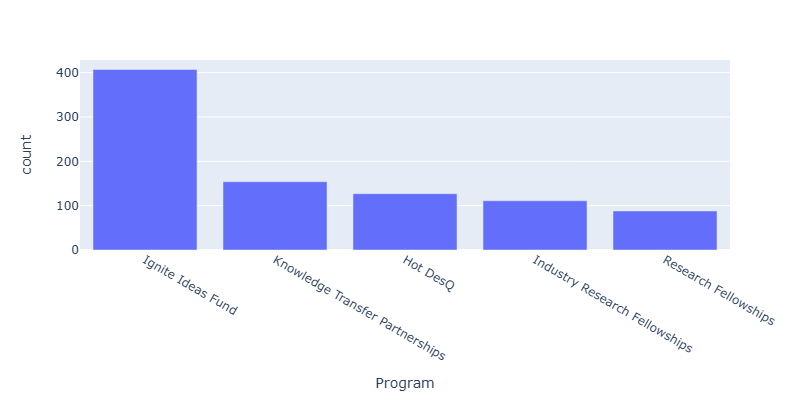

In [32]:
#choose top 5 highest of count to see the most popular program 

top_5_df = count_df.sort_values(by='count', ascending=False).head(5)
fig = px.bar(top_5_df,x='Program',y='count',width=600,height=400)
fig.show()

Regarding the bar chart above, we can clearly see the difference of numbers among the top 5 highest programs. "Ignite Ideas Fund" is the program that has the most data, which is the most popular program and can provide a lot of information.

About this program, according to the Advance Queensland Website, "Ignite Ideas Fund" supports Queensland-based small to medium businesses that have high-growth potential to commercialise innovative and new products or services. 


Next, let's find out more about descriptive statistic of the funding allocation between SEQ and regional queensland to see the balance among them.

In [33]:
#Filter 'Ignite Ideas Fund' in program
selected_df = df[df['Program'] == 'Ignite Ideas Fund']
regional_df = selected_df.groupby(['Region Classification'])['Actual Contractual Commitment ($)'].describe()
#Select the function "describe()" to see the difference of count and mean funding between Region Classification.
regional_df

,count,mean,std,min,25%,50%,75%,max
Region Classification,,,,,,,,
Regional Queensland,58.0,113903.724138,54790.549772,49834.0,93300.0,100000.0,100000.0,250000.0
SEQ,349.0,122626.051576,53699.690873,29745.0,99901.0,100000.0,100000.0,250000.0


In [34]:
regional_df.loc['Regional Queensland']  # locate row with index 'Regional Queensland'

count        58.000000
mean     113903.724138
std       54790.549772
min       49834.000000
25%       93300.000000
50%      100000.000000
75%      100000.000000
max      250000.000000
Name: Regional Queensland, dtype: float64

In [35]:
regional_df.loc['SEQ'] # locate row with index 'SEQ'

count       349.000000
mean     122626.051576
std       53699.690873
min       29745.000000
25%       99901.000000
50%      100000.000000
75%      100000.000000
max      250000.000000
Name: SEQ, dtype: float64

In [36]:
Regional_Queensland = regional_df.loc['Regional Queensland'] 
SEQ = regional_df.loc['SEQ']
# Note formatting of numbers
print(f"In Regional Queensland, the number of projects under Ignite Ideas Fund is {Regional_Queensland['count']:}, and the average of funding is ${Regional_Queensland['mean']:.2f}.")
print(f"In South-East Queensland, the number of projects under Ignite Ideas Fund is {SEQ['count']:} , and the average of funding is ${SEQ['mean']:.2f}.")

In Regional Queensland, the number of projects under Ignite Ideas Fund is 58.0, and the average of funding is $113903.72.
In South-East Queensland, the number of projects under Ignite Ideas Fund is 349.0 , and the average of funding is $122626.05.


In [37]:
#Group 'Year' and 'Region Classification' as MutiIndex and 'Actual Contractual Commitment ($)' as column.

selected_col = ['Actual Contractual Commitment ($)'] 
grouped_df = selected_df.groupby(['Round','Region Classification'])[selected_col]

#Select the function "sum()" as the sum of amounts in the same region classification and within the same round.
regional_df = grouped_df.sum()
regional_df

Actual Contractual Commitment ($)
Round                                Region Classification                                   
AQ Ignite Ideas Fund 2015-16 Round 1 Regional Queensland                             985934.0
                                     SEQ                                            4343347.0
AQ Ignite Ideas Fund 2016-17 Round 2 Regional Queensland                            1215043.0
                                     SEQ                                            8937280.0
AQ Ignite Ideas Fund 2017-18 Round 3 Regional Queensland                             908108.0
                                     SEQ                                            8838811.0
AQ Ignite Ideas Fund 2017-18 Round 4 Regional Queensland                            1755909.0
                                     SEQ                                            5984395.0
AQ Ignite Ideas Fund 2018-19 Round 5 Regional Queensland                             399462.0
                                     SEQ                                            5957671.0
AQ Ignite Ideas Fund 2019-20 Round 6 Regional Queensland                             300000.0
                                     SEQ                                            1174000.0
AQ Ignite Ideas Fund 2020-21 Round 7 Regional Queensland                             200000.0
                                     SEQ                                            3379603.0
AQ Ignite Ideas Fund 2021-22 Round 8 Regional Queensland                             641960.0
                                     SEQ                                            1769995.0
AQ Ignite Ideas Fund 2022-23 Round 9 Regional Queensland                             200000.0
                                     SEQ                                            2411390.0

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



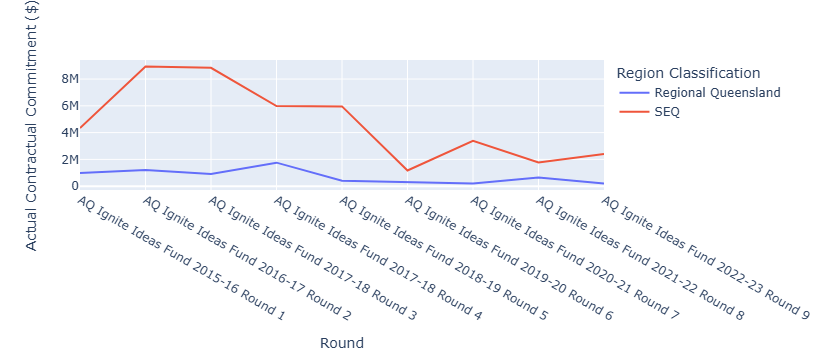

In [38]:
#Visualing the data by line graph to clearly show the trend of each round
df_reset = regional_df.reset_index()
regional_line = px.line(df_reset, x='Round', y='Actual Contractual Commitment ($)', color='Region Classification')
regional_line.show()

Overall, SEQ got more funding than regional queesland, which is reasonable because of the different population and the different development between urban area and countryside. For Regional Queensland, there seem no obvious trending changes during these rounds, which leads to a concern that there is not much growth of innotiative development in those areas. For SEQ, it presents a downward trend in general, especially after Round 5. It can be interpreted that start-up development is gradually being restricted in this area.

**Q2. How does the funding allocation support specified groups, such as aboriginal resident or innotative companies?**

To achieve this, we'll look into the mean of funding in programs and the number of projects of each program. By doing this, we can compare the depth (average funding of each program) and breadth (number of projects in each program) of government investment to observe how they align with the scheme's objectives.

In [39]:
# Count of projects by program
project_count = df['Program'].value_counts().reset_index(name = 'count')

project_count_df= project_count.sort_values(by='count', ascending=False).head(10)  # the top 10 programs by project count
project_count_df

,Program,count
0,Ignite Ideas Fund,407
1,Knowledge Transfer Partnerships,154
2,Hot DesQ,127
3,Industry Research Fellowships,111
4,Research Fellowships,88
5,Queensland Startup Events and Activities Fund,73
6,Young Starters' Fund,50
9,Innovation Partnerships Grants,22
7,Small Business Innovation Research,22
8,PhD Scholarships,22


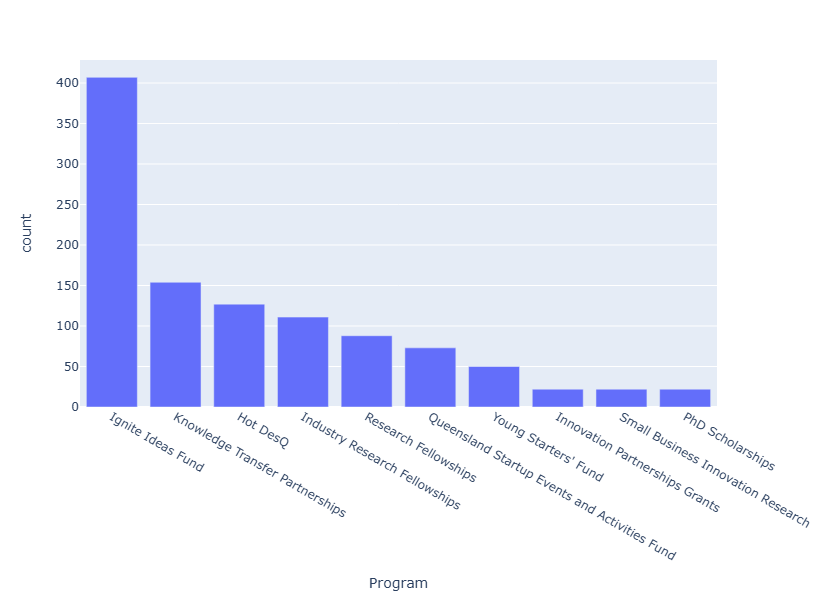

In [40]:
fig = px.bar(project_count_df,x='Program',y='count',width=600,height=600)
fig.show()

The bar chart above presents the difference of numbers among programs. It is obvious that 'Ignite Ideas Fund' got a high number of projects, which suggests the high influence of this program.

Regarding to the chart above and the introduction on the Advance Queensland website, these programs focus on innovation and startup ecosystem, such as Ignite Ideas Fund, Knowledge Transfer Partnerships, Young Starters' Fund, Queensland Startup Events and Activities Fund and Small Business Innovation Research. It reflect these initiatives are more popular and had a broader impact across the society. 

In [41]:
#Get descriptive statistic to see the mean of funding in programs
grouped_df = df.groupby(['Program'])['Actual Contractual Commitment ($)'].describe()
# the top 10 programs by sum of funding
grouped_df_reset = grouped_df.reset_index() # reset index to make 'program' become column instead of an index
average = grouped_df_reset.sort_values(by='mean', ascending=False).head(10)

average

,Program,count,mean,std,min,25%,50%,75%,max
76,UQ - COVID-19 Vaccine,1.0,10000000.0,NaN,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0
12,Data61,1.0,5695000.0,NaN,5695000.0,5695000.0,5695000.0,5695000.0,5695000.0
4,Artificial Intelligence Hub,1.0,5000000.0,NaN,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0
9,Clem Jones Centre for Ageing Dementia Research,1.0,5000000.0,NaN,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0
48,Queensland Emory Drug Discovery Initiative,1.0,4169000.0,NaN,4169000.0,4169000.0,4169000.0,4169000.0,4169000.0
42,Platform Technology Program,4.0,3826918.0,3.659106e+06,1000000.0,1375000.0,2653836.0,5105754.0,9000000.0
64,Siemens Healthcare,1.0,3198649.0,NaN,3198649.0,3198649.0,3198649.0,3198649.0,3198649.0
3,Agtech and Logistics Hub,1.0,3000000.0,NaN,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0
62,Rockhampton Technology and Innovation Centre,1.0,2800000.0,NaN,2800000.0,2800000.0,2800000.0,2800000.0,2800000.0
20,Growing Queensland's Companies,1.0,2202334.0,NaN,2202334.0,2202334.0,2202334.0,2202334.0,2202334.0


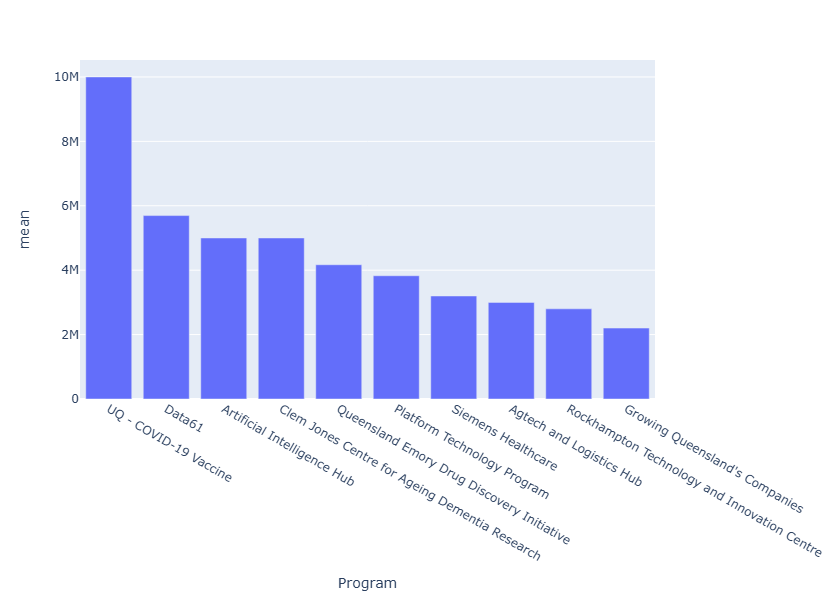

In [42]:

fig = px.bar(average,x='Program',y='mean',width=600,height=600)
fig.show()

The top 10 highest average funding per project indicates how substantial the support is for each program from the government, which means these programs have a high potential for economic return and strategic importance. Therefore, we can see that the government invests more money per project in researching professional techniques, especially collaborating with universities. For example, UQ - COVID-19 Vaccine, which was proceeding in UQ, dedicated the invention of a medical vaccine, that is influential to global human health. Also, the Artificial Intelligence Hub in UQ and QUT is essential to invest in because of its complicated technology knowledge.

## Insights: 

According to the line graph, we can see that the trend in regional areas is steady but it had a significant decline in SEQ. It reflects that innovatives in remote areas did not grow a lot and the acceptance for startup businesses is declining in SEQ areas. It may be because SEQ areas have been developed to a certain extent, the market is approaching saturation, and innovation development is restricted. However, the good news is that their funding averages are similar. From the descriptive statistics results, we have seen that there are $113903.72 in Regional Queensland and 122626.05 in SEQ, so there is no problem of imbalance allocation between them. Due to the lack of educational resources in rural areas, innovative ideas and talents are not enough, which leads to the difference in application counts. Therefore, it causes the gap in total funding between SEQ and the remainder of areas. To narrow down the gap between them, Queensland government can come up with some policies to expand the development from cities to remote areas. For example, for applicants from some rural areas, the government can increase the fund of innovation grants or reduce the cash return they should submit to improve the environment for small companies and attract more talent to move to regional areas. 

On the other hand, by investigating the depth (average funding of each program) and breadth (number of projects in each program) of government investment, we can better understand the government's funding strategy and the support for specified groups. To encourage the development of small companies, the government approves a great number of projects in innovative programs, such as Ignite Ideas Fund, Knowledge Transfer Partnerships, and Small Business Innovation Research. It can reflect on comercial growth in the community. When it comes to the research on university expertise, the government spares no effort to invest money in every difficult project. It is significant to the advance techniques progress. To examine whether these expenditures have a substantial impact, more outcome data and follow-up case studies are needed.

In conclusion, the balance of funding distribution between South-East Queensland and Regional Queensland does not exist significant issue. However, some special treatments for innovatives in regional areas can be provided to stimulate growth. In addition, the government also gave different ways of effort to the development of new enterprises and professional and technical development. Further research can be done to investigate their outcomes so that the government can invest more accurately and bring benefits to society.